In [1]:
import os
print(os.cpu_count())

12


In [1]:
import numpy as np
import time
import math

# Problems
#import src.problems.more_trig as problem
import src.problems.more_eps as problem
#import src.problems.cuter as problem
#import src.problems.denoise_image as problem
#import src.problems.lr_gen_l1 as problem
#import src.problems.easy as problem
#import src.problems.rosenbrock as problem

# Config and method
from src.cgd import choice_coordinates, calculate_H, calulate_direction, calculate_alpha, count_nonzeros, step
from src.metrics import init_metrics, generate_metrics


In [4]:
# Config

armijo = {
    'alfa_init': 1,
    'sigma': 0.1,
    'beta': 0.5,
    'gamma': 0,
    'stop_alfa': 1e-18 # Paper use 1e-30
}

v_gauss_sw_init = 0.5  # Init like paper

use_parallel = False

#c=problem.c
c=10


In [5]:

# Get x0
x = problem.x_init()

# Init config
alfa = armijo['alfa_init']
v_gauss_southwell = v_gauss_sw_init

# Init metrics
hist, ts_metrics = init_metrics()

# Loop
k = 0
while True:
    #if k >= 10:
    #    break

    # One step of the method
    (x,
    alfa,
    v_gauss_southwell,
    stop_loop,
    step_metrics) = step(k,
                         x,
                         problem,
                         c,
                         armijo,
                         alfa,
                         v_gauss_southwell,
                         use_parallel,
                         ts_metrics)
    k = k+1

    # Show metrics.
    hist.append(step_metrics)

    if stop_loop:
        break



Iteration 0
f value:, 57500.00
f grad:, 13497.00
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 1
f value:, 11365.75
f grad:, 2723.44
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 2
f value:, 8269.74
f grad:, 2025.30
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 3
f value:, 7401.74
f grad:, 1332.55
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 4
f value:, 6796.14
f grad:, 1392.51
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 5
f value:, 6253.20
f grad:, 1228.28
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 6
f value:, 5691.39
f grad:, 1189.18
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 7
f value:, 5186.12
f grad:, 1085.63
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 8
f value:, 4677.18
f grad:, 1021.78
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 9
f value:, 4206.11
f grad:, 936.43
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 10
f value:, 3746.38
f grad:, 865.65
Lenght J: 1000 / 1000
NZ: 1000 / 1000

Iteration 11
f value:, 3316.39
f grad:, 788.04
Leng

In [6]:
from src.l_bfgs_b import l_bfgs_b

result = l_bfgs_b(problem, c)
print(f"Function obj: {result[1]}")
print(f"Non Zeros: {result[2]}")
print(f"Seconds: {result[3]}")


CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Function obj: 1249.9912211334647
Non Zeros: 250
Seconds: 11.197278408


Total seconds: 15.050


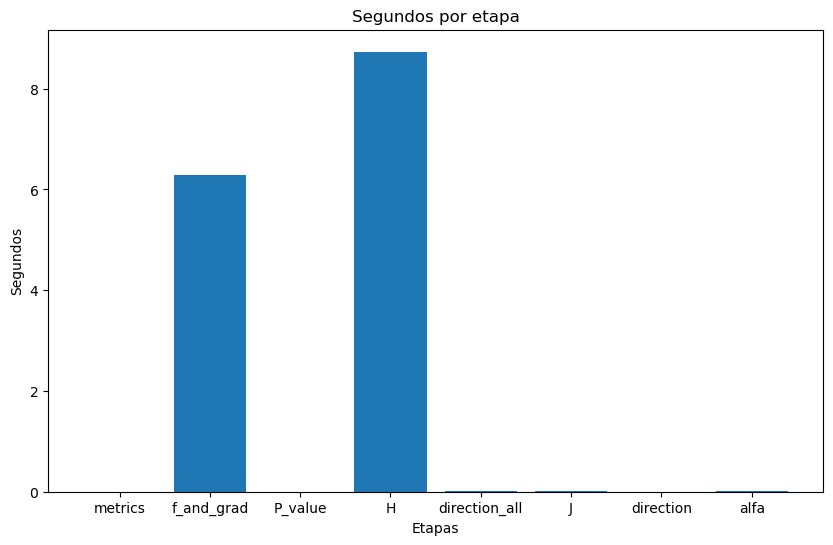

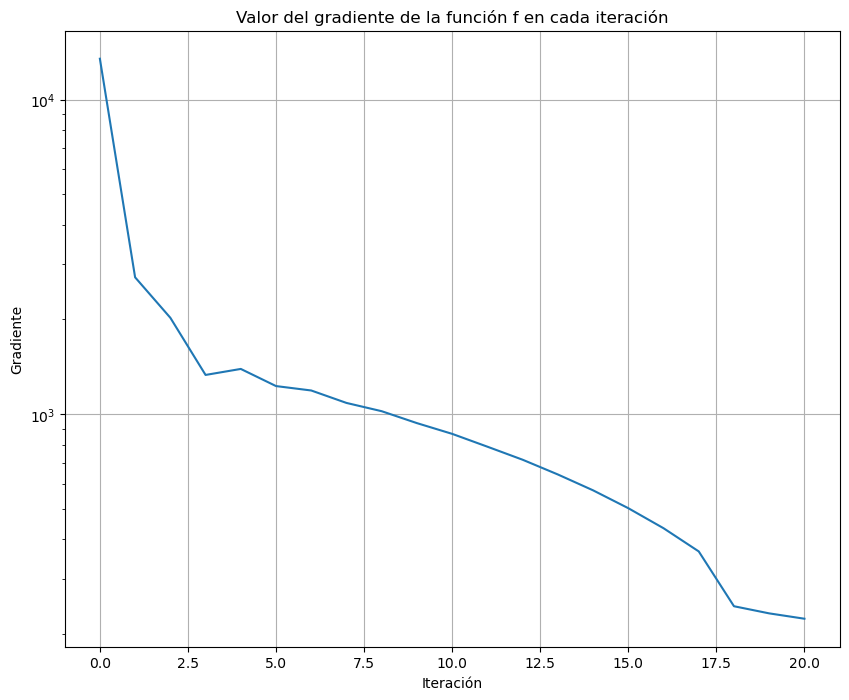

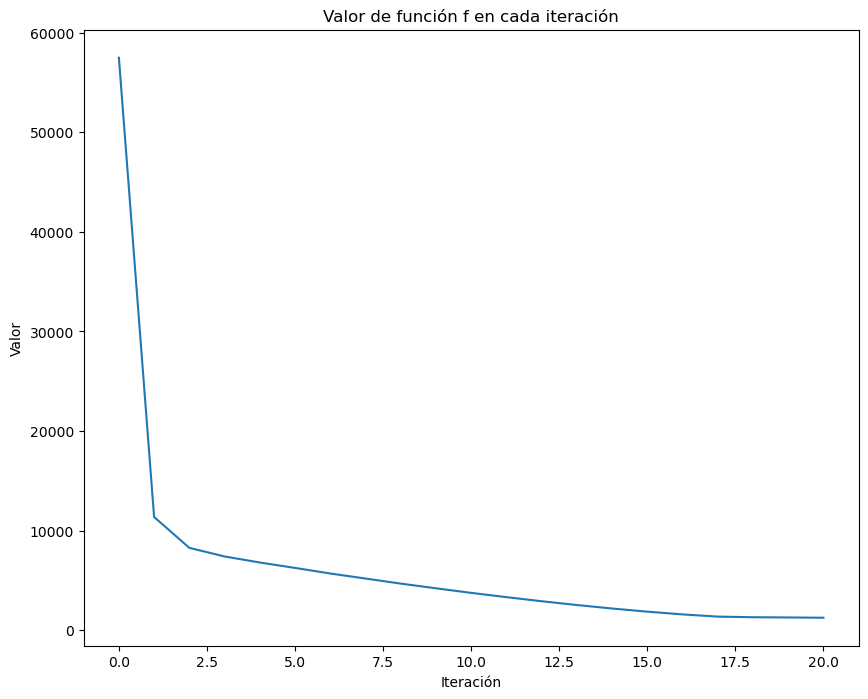

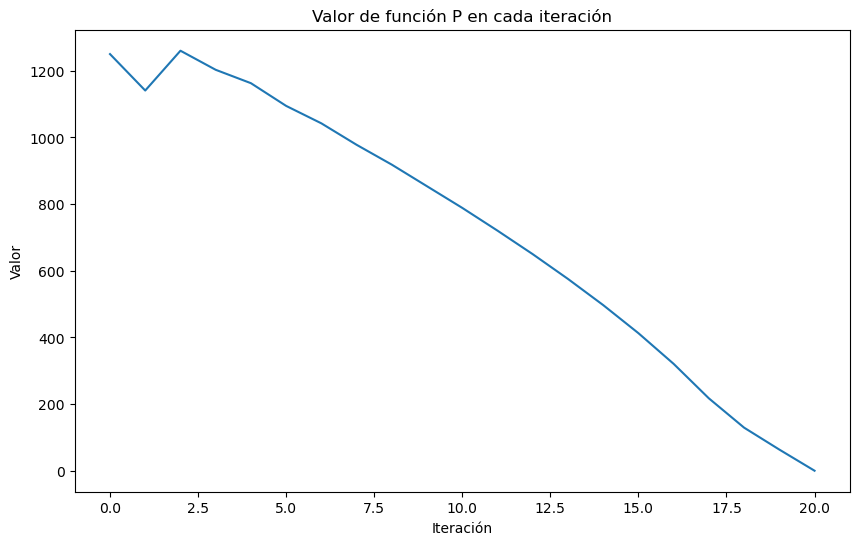

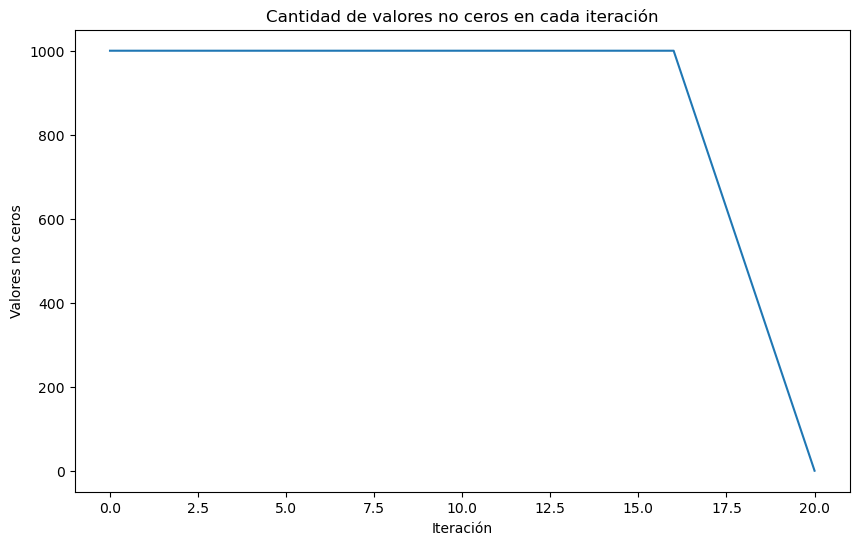

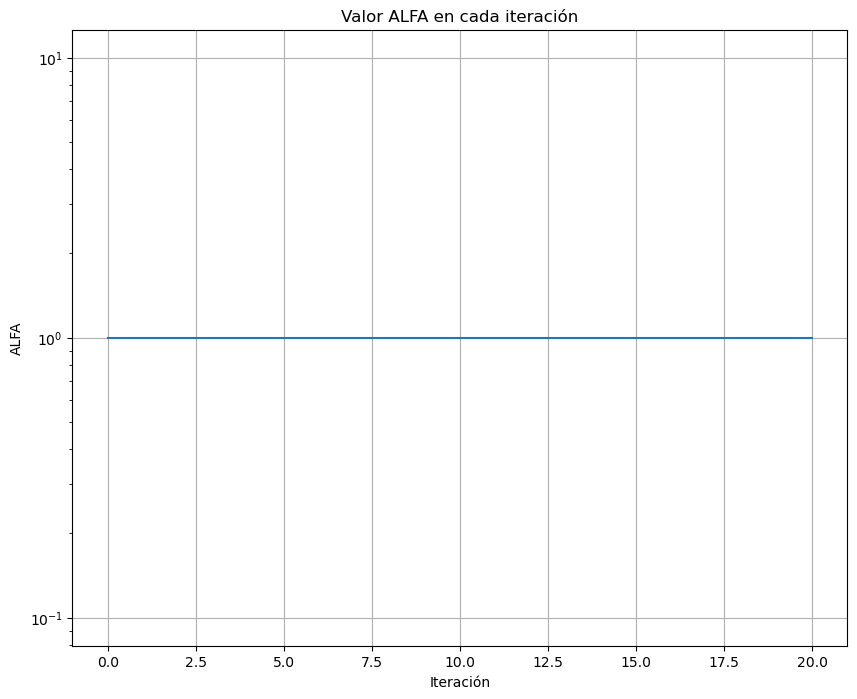

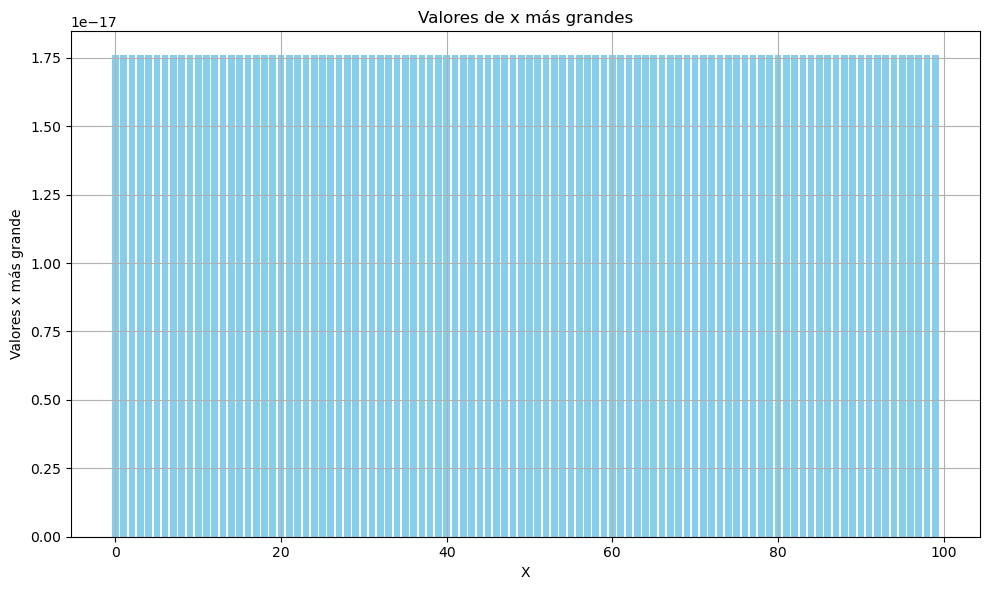

In [7]:
generate_metrics(f"./metrics/{problem.name}", x, hist, ts_metrics)